In [2]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline
# the above line makes sure the show the graphs in the notebook

In [142]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [143]:
cols = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

In [144]:
df[cols]

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369
...,...,...,...,...,...
9699,140,164.0,2981.107371,2013,15.101802
9700,180,154.0,2439.525729,2004,17.962326
9701,220,138.0,2583.471318,2008,17.186587
9702,230,177.0,2905.527390,2011,15.331551


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

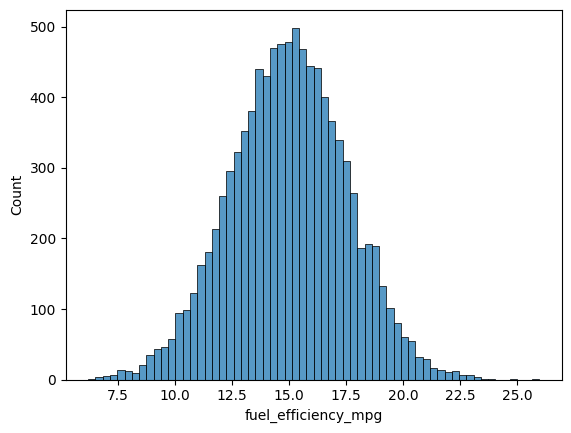

In [145]:
sns.histplot(df.fuel_efficiency_mpg)

In [146]:
# checking missing vals
df[cols].isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [147]:
df.horsepower.median()

np.float64(149.0)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
df_full_train, df_test = train_test_split(df[cols], test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [150]:
y_train = df_train.fuel_efficiency_mpg
y_val = df_val.fuel_efficiency_mpg
y_test = df_test.fuel_efficiency_mpg
y_full_train = df_full_train.fuel_efficiency_mpg

In [151]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']
del df_full_train['fuel_efficiency_mpg']

handeling null vals

In [152]:
df_train.isnull().sum()

engine_displacement      0
horsepower             418
vehicle_weight           0
model_year               0
dtype: int64

In [153]:
X_train_0 = df_train.fillna(0)
X_train_0.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [154]:
X_train_mean = df_train.fillna(df.horsepower.mean())
X_train_mean.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [155]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    XTX_inv = np.linalg.inv(XTX)

    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

#### Using null 

In [156]:
w0, w = train_linear_regression(X_train_0,y_train)

w0, w

(np.float64(26.278453123419258),
 array([ 0.00022059,  0.00378754, -0.00501188,  0.00158312]))

In [157]:
# checking the model using x_val

In [158]:
X_val = df_val

y_pred = w0 + X_val.dot(w)
y_pred

752     16.271732
8828    16.041634
421     18.757517
5991    18.350313
896     21.380642
          ...    
946     17.172657
1460    15.064025
7690    14.250401
6905    17.227149
3484    10.911087
Length: 1941, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

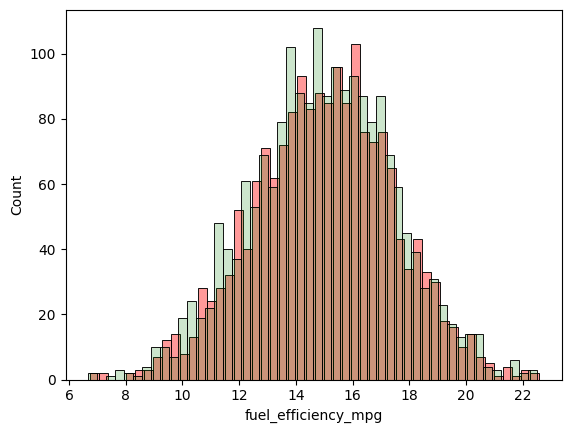

In [159]:
sns.histplot(y_pred, color = 'red', alpha = 0.4, bins = 50)
sns.histplot(y_val, color = 'green', alpha = 0.2, bins = 50)

In [160]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)


In [161]:
rmse(y_val, y_pred).round(2)

np.float64(0.49)

Now lets try with the mean

In [162]:
w0, w = train_linear_regression(X_train_mean,y_train)

w0, w

(np.float64(27.010709949947643),
 array([ 0.00033037,  0.01031662, -0.00500841,  0.00069657]))

In [163]:
y_pred = w0 + X_val.dot(w)
y_pred

752     16.280476
8828    16.243400
421     18.897278
5991    18.622760
896     21.063875
          ...    
946     16.956252
1460    15.118197
7690    14.264355
6905    17.235192
3484    10.694560
Length: 1941, dtype: float64

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

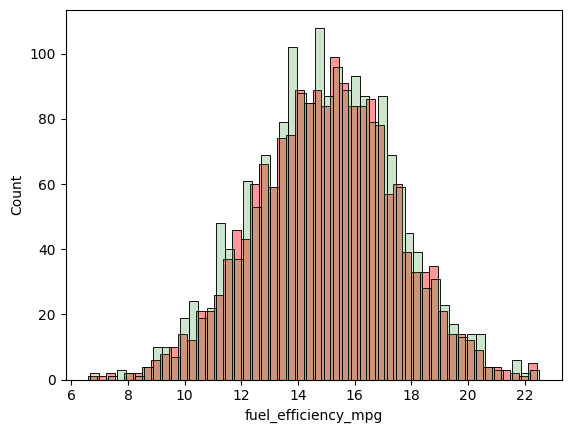

In [164]:
sns.histplot(y_pred, color = 'red', alpha = 0.4, bins = 50)
sns.histplot(y_val, color = 'green', alpha = 0.2, bins = 50)

In [165]:
rmse(y_val, y_pred).round(2)

np.float64(0.45)

#### Q4

In [166]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [168]:
X_train = df_train.fillna(0)
X_train.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [169]:
X_Val = df_val

In [173]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100, 10000000, 0.00000000001]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val,y_pred).round(2)
    
    print(r, score)

0 0.49
0.01 0.49
0.1 0.49
1 0.49
5 0.49
10 0.49
100 0.49
10000000 0.51
1e-11 0.49


#### Q5

In [175]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [197]:
scores = []

for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_full_train, df_test = train_test_split(df[cols], test_size = 0.2, random_state = i)
    df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = i)

    y_train = df_train.fuel_efficiency_mpg
    y_val = df_val.fuel_efficiency_mpg
    y_test = df_test.fuel_efficiency_mpg
    y_full_train = df_full_train.fuel_efficiency_mpg

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']
    del df_full_train['fuel_efficiency_mpg']

    X_train = df_train.fillna(0)
    
    # training the model
    w0, w = train_linear_regression(X_train,y_train)

    # evaluating the model
    X_val = df_val
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append([i, score])


In [202]:
scores = np.array(scores)
scores

array([[0.        , 0.5092267 ],
       [1.        , 0.48720864],
       [2.        , 0.49595254],
       [3.        , 0.49146273],
       [4.        , 0.49280019],
       [5.        , 0.51049945],
       [6.        , 0.47796581],
       [7.        , 0.49938495],
       [8.        , 0.49314112],
       [9.        , 0.48644411]])

In [205]:
std = np.std(scores[:,1])
std

np.float64(0.009508673550354346)

In [206]:
round(std, 3)

np.float64(0.01)

#### Q6

In [208]:
df_full_train, df_test = train_test_split(df[cols], test_size = 0.2, random_state = 9)

In [210]:
y_test = df_test.fuel_efficiency_mpg
y_full_train = df_full_train.fuel_efficiency_mpg

del df_test['fuel_efficiency_mpg']
del df_full_train['fuel_efficiency_mpg']

In [214]:
len(df_full_train), len(df_test)

(7763, 1941)

In [217]:
X_train = df_full_train.fillna(0)
X_test = df_test

In [219]:
w0, w = train_linear_regression_reg(X_train, y_full_train, 0.001)

y_pred = w0 + X_test.dot(w)

score = rmse(y_test,y_pred)

score

np.float64(0.49086144489566835)